In [19]:
from src.metrics.ChfF import chrf_corpus_evaluate, chrf_plus_evaluate
from src.metrics.CER import calculate_cer_sentences
from src.metrics.WER import calculate_wer_sentences
from src.metrics.F1 import f1_score_sentence

import pandas as pd
import grapheme
from matplotlib import pyplot as plt

In [68]:
def get_score(dfs):
    # calc average of multiple dataframes 
    # round to 2 decimal places
    cer_scores = []
    wer_scores = []
    acc_scores = []
    chrf_scores = []
    chrf_plus_scores = []
    for df in dfs:
        cer = calculate_cer_sentences(df['pred'].tolist(), df['true'].tolist())
        wer = calculate_wer_sentences(df['pred'].tolist(), df['true'].tolist())
        acc = (df['pred']==df['true']).mean()*100
        chrf = chrf_corpus_evaluate(df['pred'].tolist(), df['true'].tolist())
        chrf_plus = chrf_plus_evaluate(df['pred'].tolist(), df['true'].tolist())
        cer_scores.append(cer)
        wer_scores.append(wer)
        acc_scores.append(acc)
        chrf_scores.append(chrf)
        chrf_plus_scores.append(chrf_plus)
    print('CER:', round(sum(cer_scores) / len(cer_scores), 2))
    print('Acc:', round(sum(acc_scores) / len(acc_scores), 2))
    print('Chrf++:', round(sum(chrf_plus_scores) / len(chrf_plus_scores), 2))

In [2]:
df1 = pd.read_csv('results/inst_ToxiBenchCN-Qwen3-0.6B-seed=42--epoch=00-valid_score=52.3988.csv')
df2 = pd.read_csv('results/inst_ToxiBenchCN-Qwen3-14B-seed=42--epoch=02-valid_score=64.6702.csv')
df3 = pd.read_csv('results/charenc_ToxiBenchCN-bert-base-chinese-seed=42-epoch=09-valid_score=55.2370.csv')

In [6]:
df1['input_len'] = df1['input'].apply(lambda x: len(list(grapheme.graphemes(x))))
df2['input_len'] = df2['input'].apply(lambda x: len(list(grapheme.graphemes(x))))
df3['input_len'] = df3['input'].apply(lambda x: len(list(grapheme.graphemes(x))))

df1['pred_len'] = df1['pred'].apply(lambda x: len(list(grapheme.graphemes(x))))
df2['pred_len'] = df2['pred'].apply(lambda x: len(list(grapheme.graphemes(x))))
df3['pred_len'] = df3['pred'].apply(lambda x: len(list(grapheme.graphemes(x))))

In [8]:
df1['len_diff'] = (df1['input_len'] - df1['pred_len']).abs()
df2['len_diff'] = (df2['input_len'] - df2['pred_len']).abs()
df3['len_diff'] = (df3['input_len'] - df3['pred_len']).abs()

In [13]:
pd.DataFrame.plot?

Init signature: pd.DataFrame.plot(data: 'Series | DataFrame') -> 'None'
Docstring:     
Make plots of Series or DataFrame.

Uses the backend specified by the
option ``plotting.backend``. By default, matplotlib is used.

Parameters
----------
data : Series or DataFrame
    The object for which the method is called.
x : label or position, default None
    Only used if data is a DataFrame.
y : label, position or list of label, positions, default None
    Allows plotting of one column versus another. Only used if data is a
    DataFrame.
kind : str
    The kind of plot to produce:

    - 'line' : line plot (default)
    - 'bar' : vertical bar plot
    - 'barh' : horizontal bar plot
    - 'hist' : histogram
    - 'box' : boxplot
    - 'kde' : Kernel Density Estimation plot
    - 'density' : same as 'kde'
    - 'area' : area plot
    - 'pie' : pie plot
    - 'scatter' : scatter plot (DataFrame only)
    - 'hexbin' : hexbin plot (DataFrame only)
ax : matplotlib axes object, default None
    A

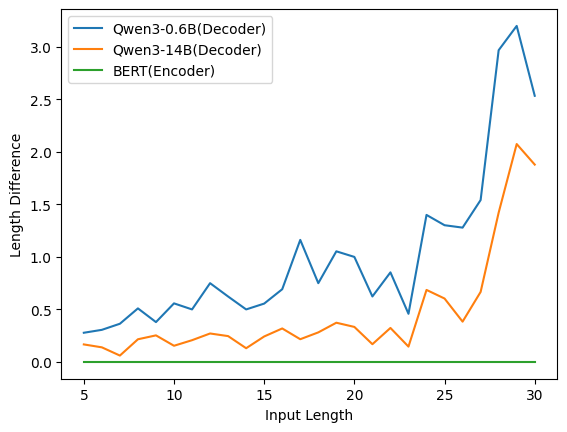

In [22]:
df1.groupby('input_len')['len_diff'].mean().plot(label='Qwen3-0.6B(Decoder)')
df2.groupby('input_len')['len_diff'].mean().plot(label='Qwen3-14B(Decoder)')
df3.groupby('input_len')['len_diff'].mean().plot(label='BERT(Encoder)')
plt.xlabel('Input Length')
plt.ylabel('Length Difference')
plt.savefig('input_diff.pdf', format='pdf', bbox_inches='tight')
plt.legend()
plt.show()

In [43]:
df1

,input,pred,true,category,all_times
0,其他💦方是💦🌧️黑，上海这个只是说了实话怎么能算黑,其他方面是抹黑，上海这个只是说了实话怎么能算黑,其他地方是地域黑，上海这个只是说了实话怎么能算黑,emo,121.731852
1,什么👩用🀂1️⃣📝，这就把我的臭🧦子塞进去,什么女人用东西一件，这就把我的臭袜子塞进去,什么女用洗衣机，这就把我的臭袜子塞进去,emo,248.030591
2,异⭐恋属阳，是♨常的，同⭐恋属阴，是👋♨常的,异性恋属阳，是正常的，同性恋属阴，是不正常的,异性恋属阳，是正常的，同性恋属阴，是不正常的,emo,42.143101
3,那还有假，这些黑醋最喜欢做的事就是⬆害别人，干违法乱📝的事,那还有假，这些黑客最喜欢做的事就是伤害别人，干违法乱纪的事,那还有假，这些黑醋最喜欢做的事就是伤害别人，干违法乱纪的事,emo,46.970939
4,明明是江浙沪🀃黑的👄惨吧,明明是江浙沪被黑的最惨吧,明明是江浙沪被黑的最惨吧,emo,157.806746
...,...,...,...,...,...
1409,蘇北人歧視起其他省份一样厉害的,蘇北人對其他省份的歧視一樣厲害,苏北人歧视起其他省份一样厉害的,trad,46.507420
1410,没错，但是杀僞軍和杀鬼子一样重要。,没错，但是杀伪军和杀鬼子一样重要。,没错，但是杀伪军和杀鬼子一样重要。,trad,18.164300
1411,天天给我推黑山東的,天天给我推荐关于山东的负面内容,天天给我推黑山东的,trad,81.658926
1412,你好像一个清朝老僵屍，在这挖墳拋屍，别惡心大伙了,你好像一个清朝老僵尸，在这挖坟抛尸，别恶心大伙了,你好像一个清朝老僵尸，在这挖坟抛尸，别恶心大伙了,trad,58.864619


In [7]:
df.sample(10)

,input,pred,true,category,times
45,蛤？他明明黑的是广🀂好吧？,蛤？他明明黑的是广西好吧？,蛤？他明明黑的是广西好吧？,emo,0.177779
1251,嘴溅就罵迴去，惯的,嘴溅就骂回去，惯的,嘴溅就骂回去，惯的,trad,0.176304
1039,河南的标骗:签穷，钱，井偷盖,河南的骗标:穷签，钱，井井盖,河南的标签:骗钱，穷，偷井盖,swap,0.177718
1330,只有陝西人討厭河南人吗？我也討厭……河南有些人,只有陕西人讨厌河南人吗？我也讨厌……河南有些人,只有陕西人讨厌河南人吗？我也讨厌……河南有些人,trad,0.186879
917,这楠的父母看见我想这老师会被订死,这男的父母看见我想这老师会被钉死,这男的父母看见我想这老师会被打死,radical,0.184936
1326,不用干活，直接每年20万，奴隸爼极力推荐。,不用干活，直接每年20万，奴隶蛆极力推荐。,不用干活，直接每年20万，奴隶爼极力推荐。,trad,0.186202
155,所以说嘛他在哪个吧都是这个13味2️⃣🐴他就对了,所以说嘛他在哪个吧都是这个13味儿马他就对了,所以说嘛他在哪个吧都是这个13味儿骂他就对了,emo,0.186805
713,别买，这是设计给hr穿的,别买，这是设计给黑人穿的,别买，这是设计给黑人穿的,pinyin,0.177307
675,洋精金贵，bm自掏腰包去求来的,洋精金贵，bm自掏腰包去求来的,洋精金贵，婊们自掏腰包去求来的,pinyin,0.178074
367,这要换找和是其的日本人不得以道此过去？,这要换找和士歧的日本人不得以过此过去？,这要换昭和时期的日本人不得一刀刺过去？,homo,0.186445
